In [1]:
import setGPU

import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append('../scripts')
from data_reading import *
from autoencoder_architectures import * 

setGPU: Setting GPU to: 0


/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3

In [2]:
data_obj = public_datasets()

x_train, y_train, x_test, y_test = data_obj.load_mnist()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


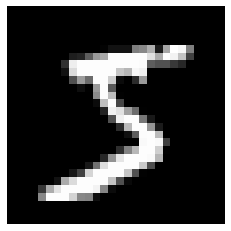

In [3]:
w = h = 28
plt.imshow(x_train[0].reshape(w, h), cmap='gray')
plt.axis('off')
plt.show()

In [4]:
latent_dim = 128
den_ae = dense_arch(x_train.shape[1], 3)
autoencoder = den_ae.undercomplete_ae_arch(latent_dim)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
history = autoencoder.fit(x_train, x_train, epochs=50, verbose=2)

Epoch 1/50
60000/60000 - 6s - loss: 0.0298 - acc: 0.0127
Epoch 2/50
60000/60000 - 6s - loss: 0.0139 - acc: 0.0132
Epoch 3/50
60000/60000 - 5s - loss: 0.0106 - acc: 0.0134
Epoch 4/50
60000/60000 - 5s - loss: 0.0090 - acc: 0.0138
Epoch 5/50
60000/60000 - 6s - loss: 0.0080 - acc: 0.0140
Epoch 6/50
60000/60000 - 5s - loss: 0.0073 - acc: 0.0143
Epoch 7/50
60000/60000 - 6s - loss: 0.0068 - acc: 0.0144
Epoch 8/50
60000/60000 - 6s - loss: 0.0064 - acc: 0.0141
Epoch 9/50
60000/60000 - 6s - loss: 0.0061 - acc: 0.0142
Epoch 10/50
60000/60000 - 5s - loss: 0.0059 - acc: 0.0141
Epoch 11/50
60000/60000 - 5s - loss: 0.0057 - acc: 0.0143
Epoch 12/50
60000/60000 - 5s - loss: 0.0055 - acc: 0.0144
Epoch 13/50
60000/60000 - 5s - loss: 0.0054 - acc: 0.0145
Epoch 14/50
60000/60000 - 6s - loss: 0.0052 - acc: 0.0143
Epoch 15/50
60000/60000 - 6s - loss: 0.0051 - acc: 0.0148
Epoch 16/50
60000/60000 - 6s - loss: 0.0051 - acc: 0.0150
Epoch 17/50
60000/60000 - 6s - loss: 0.0050 - acc: 0.0148
Epoch 18/50
60000/60000

In [6]:
""" plot model history using this function """
def plot_history(history):
    plt.plot(history.history['acc'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()

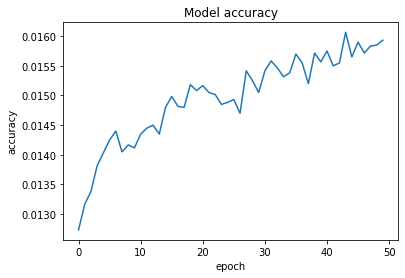

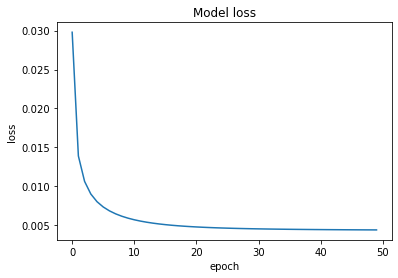

In [7]:
plot_history(history)

In [8]:
latent_codings = encoder.predict(x_test)
print(latent_codings.shape)
recont_codings = autoencoder.predict(x_test)
print(recont_codings.shape)

NameError: name 'encoder' is not defined

In [22]:
def display_original_reconstructed_images(n, images, predictions):
    plt.figure(figsize=(24,4))
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        if i == 0:
            plt.title('original_images', fontsize=18)
        plt.imshow(images[i].reshape(28,28), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        ax = plt.subplot(2, n, i+1+n)
        if i == 0:
            plt.title('reconstructed_images', fontsize=18)
        plt.imshow(predictions[i].reshape(28, 28), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

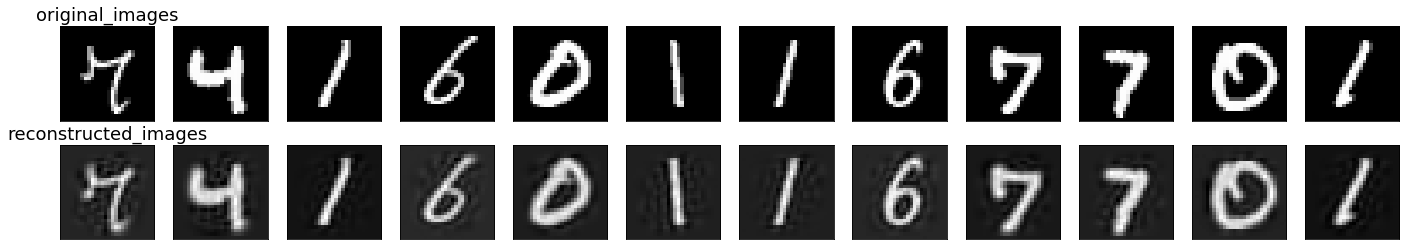

In [23]:
num_images = 12
original_images = []
reconstructed_images = []
for ind in range(num_images):
    rInd = np.random.randint(0, x_test.shape[0]-1)
    original_images.append(x_test[rInd])
    reconstructed_images.append(recont_codings[rInd])
    
display_original_reconstructed_images(num_images, original_images, reconstructed_images)

In [26]:
def display_encoder_embeddings(images):
    encoded_imgs = encoder.predict(x_test)
    print(encoded_imgs.shape)
    n = 10
    plt.figure(figsize=(20, 8))
    for i in range(n):
        ax = plt.subplot(1, n, i+1)
        plt.imshow(encoded_imgs[i].reshape(8, 16).T, cmap='gray') # 3 layer network
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

(10000, 128)


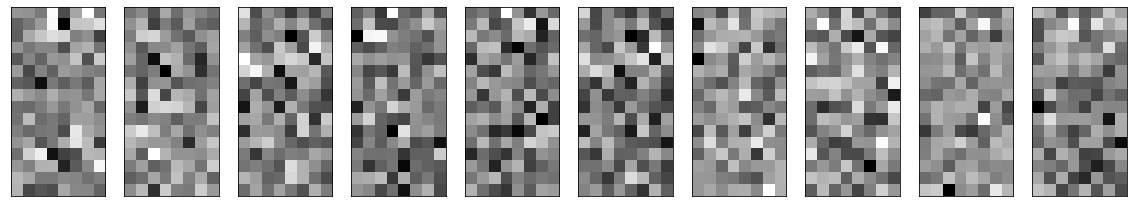

In [27]:
display_encoder_embeddings(x_train[:100])